# Coursework Final
## C1449C Data Visualisation for Enhanced Business Insights

---
Student ID: 9064187T
<br>Student Name: Jason Lee Wenzhong
---

I declare that:
<li> This submission is my original work – all sources have been properly referenced and acknowledged. 
<li> I have neither received nor rendered any assistance (either paid or unpaid) on work that requires individual effort.
<li> I have fully complied with the RP rules and regulations for students pertaining to assessments and academic integrity outlined <a href="https://myrp.sharepoint.com/sites/StudentHandbook/SitePages/assessment_rules_and_regulations.aspx">here</a> and in the SOI Guideline on Academic Dishonesty and Plagarism.pdf file.
<br><br>
If found guilty of committing any act of academic dishonesty, I understand that I will be liable: 
<li> for disciplinary action by the School
<li> to the full extent of penalties, including immediate failure for this assessment and other disciplinary actions such as dismissal
<br><br>
Retention of Backup Copy
<li> I declare that I have a back-up electronic copy of this submission for immediate resubmission.
<br><br>
IMPORTANT: Non-compliance to these clauses will result in unconditional rejection of your submission. 

---

## 1-Import Data [4 marks]

Complete the coursework using the following data files for this coursework assignment. You do not need to source for additional data sets.
<li>hotel_bookings.csv
<li>iso_country_code.csv

### 1.1 Import Library

In [1]:
# your codes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Matplotlib (optional) - to define figure size in (width, height) for all plots
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['axes.linewidth'] = 0.2

# Matplotlib (optional) - to explicitly set all your font sizes
SMALL_SIZE = 7
MEDIUM_SIZE = 9
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the Chart title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


### 1.2 Read data
Create a dataframe named as `df` to store merged data of `hotel_bookings.csv` and `iso_country_code.csv` 

In [2]:
# your codes
df_bookings = pd.read_csv("data/hotel_bookings.csv", low_memory=False)
df_bookings 

df_countrycodes = pd.read_csv("data/iso_country_code.csv")
df_countrycodes

,country_code,country_name
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa
...,...,...
247,WLF,Wallis and Futuna
248,ESH,Western Sahara
249,YEM,Yemen
250,ZMB,Zambia


In [3]:
# merge dataframes
df = pd.merge(df_bookings, df_countrycodes, on='country_code', how='left')
df

,hotel,is_cancelled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,assigned_room_type,deposit_type,agent_id,company_id,customer_type,avg_daily_rate,reservation_status,reservation_status_date,review_score,country_name
0,Resort Hotel,1,76,1/1/2018,0,3,2,0,0,BB,...,A,No Deposit,240,NaN,Transient,57.90,Cancelled,1/1/2018,NaN,Portugal
1,Resort Hotel,0,20,1/1/2018,0,2,2,0,0,BB,...,A,No Deposit,250,NaN,Transient,57.00,Check-Out,3/1/2018,5.3,Italy
2,Resort Hotel,0,63,1/1/2018,0,1,2,0,0,BB,...,D,No Deposit,240,NaN,Transient-Party,59.94,Check-Out,2/1/2018,9.7,Russia
3,Resort Hotel,0,88,1/1/2018,0,2,2,0,0,HB,...,D,No Deposit,241,NaN,Transient,73.46,Check-Out,3/1/2018,6.2,Argentina
4,Resort Hotel,0,88,1/1/2018,0,2,2,1,0,HB,...,D,No Deposit,241,NaN,Transient,90.17,Check-Out,3/1/2018,5.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119505,City Hotel,0,95,16/3/2020,0,2,2,0,0,BB,...,A,No Deposit,8,NaN,Transient,90.80,Check-Out,12/12/2019,8.6,Portugal
119506,City Hotel,0,98,19/3/2020,0,1,2,0,0,BB,...,A,No Deposit,8,NaN,Transient,90.80,Check-Out,12/12/2019,9.4,Spain
119507,City Hotel,0,95,5/3/2020,0,1,2,0,0,BB,...,A,No Deposit,9,NaN,Transient,93.57,Check-Out,1/12/2019,8.7,Algeria
119508,City Hotel,0,84,5/3/2020,0,2,2,0,0,BB,...,A,No Deposit,14,NaN,Transient,83.93,Check-Out,12/12/2019,9.0,Spain


In [4]:
# i find that the country_name is all the way at the right side, no easy to read. this code is to shift it next to country_code for easier viewing
country_name = df['country_name']  # Extract the column to move
df = df.drop('country_name', axis=1)  # Drop the original column
df.insert(df.columns.get_loc('country_code') + 1, 'country_name', country_name) 
df

,hotel,is_cancelled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,deposit_type,agent_id,company_id,customer_type,avg_daily_rate,reservation_status,reservation_status_date,review_score
0,Resort Hotel,1,76,1/1/2018,0,3,2,0,0,BB,...,A,A,No Deposit,240,NaN,Transient,57.90,Cancelled,1/1/2018,NaN
1,Resort Hotel,0,20,1/1/2018,0,2,2,0,0,BB,...,A,A,No Deposit,250,NaN,Transient,57.00,Check-Out,3/1/2018,5.3
2,Resort Hotel,0,63,1/1/2018,0,1,2,0,0,BB,...,A,D,No Deposit,240,NaN,Transient-Party,59.94,Check-Out,2/1/2018,9.7
3,Resort Hotel,0,88,1/1/2018,0,2,2,0,0,HB,...,A,D,No Deposit,241,NaN,Transient,73.46,Check-Out,3/1/2018,6.2
4,Resort Hotel,0,88,1/1/2018,0,2,2,1,0,HB,...,A,D,No Deposit,241,NaN,Transient,90.17,Check-Out,3/1/2018,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119505,City Hotel,0,95,16/3/2020,0,2,2,0,0,BB,...,A,A,No Deposit,8,NaN,Transient,90.80,Check-Out,12/12/2019,8.6
119506,City Hotel,0,98,19/3/2020,0,1,2,0,0,BB,...,A,A,No Deposit,8,NaN,Transient,90.80,Check-Out,12/12/2019,9.4
119507,City Hotel,0,95,5/3/2020,0,1,2,0,0,BB,...,A,A,No Deposit,9,NaN,Transient,93.57,Check-Out,1/12/2019,8.7
119508,City Hotel,0,84,5/3/2020,0,2,2,0,0,BB,...,A,A,No Deposit,14,NaN,Transient,83.93,Check-Out,12/12/2019,9.0


In [5]:
# inspect the columns to ensure that the country_name column has been shifted accordingly
df.columns

Index(['hotel', 'is_cancelled', 'lead_time', 'arrival_date',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country_code', 'country_name', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent_id', 'company_id', 'customer_type',
       'avg_daily_rate', 'reservation_status', 'reservation_status_date',
       'review_score'],
      dtype='object')

In [6]:
# save the dataframe to Excel file
df.to_excel('output/hotel_bookings_cleaned.xlsx', index=False)

## 2-Understand Data [2 marks]

### 2.1 List all the column names

In [7]:
# your codes
df.columns

Index(['hotel', 'is_cancelled', 'lead_time', 'arrival_date',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country_code', 'country_name', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent_id', 'company_id', 'customer_type',
       'avg_daily_rate', 'reservation_status', 'reservation_status_date',
       'review_score'],
      dtype='object')

### 2.2 For each column, list the data type

In [8]:
# your codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119510 entries, 0 to 119509
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119510 non-null  object 
 1   is_cancelled             119510 non-null  int64  
 2   lead_time                119510 non-null  int64  
 3   arrival_date             119510 non-null  object 
 4   stays_in_weekend_nights  119510 non-null  int64  
 5   stays_in_week_nights     119510 non-null  int64  
 6   adults                   119510 non-null  int64  
 7   children                 119510 non-null  int64  
 8   babies                   119510 non-null  int64  
 9   meal                     119510 non-null  object 
 10  country_code             119510 non-null  object 
 11  country_name             119510 non-null  object 
 12  market_segment           119510 non-null  object 
 13  distribution_channel     119510 non-null  object 
 14  rese

## 3-Prepare Data [4m]

### 3.1 Change reservation_status_date to datetime type in %d/%m/%Y format and show how you ensure that the data type is indeed changed

In [9]:
# your codes
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y', errors='coerce')
# to ensure consistency, to also change arrival_date to datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%d/%m/%Y', errors='coerce')

# reservation_status_date and arrival_date is now changed to datetime format
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119510 entries, 0 to 119509
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   hotel                    119510 non-null  object        
 1   is_cancelled             119510 non-null  int64         
 2   lead_time                119510 non-null  int64         
 3   arrival_date             119510 non-null  datetime64[ns]
 4   stays_in_weekend_nights  119510 non-null  int64         
 5   stays_in_week_nights     119510 non-null  int64         
 6   adults                   119510 non-null  int64         
 7   children                 119510 non-null  int64         
 8   babies                   119510 non-null  int64         
 9   meal                     119510 non-null  object        
 10  country_code             119510 non-null  object        
 11  country_name             119510 non-null  object        
 12  market_segment  

In [10]:
df

,hotel,is_cancelled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,deposit_type,agent_id,company_id,customer_type,avg_daily_rate,reservation_status,reservation_status_date,review_score
0,Resort Hotel,1,76,2018-01-01,0,3,2,0,0,BB,...,A,A,No Deposit,240,NaN,Transient,57.90,Cancelled,2018-01-01,NaN
1,Resort Hotel,0,20,2018-01-01,0,2,2,0,0,BB,...,A,A,No Deposit,250,NaN,Transient,57.00,Check-Out,2018-01-03,5.3
2,Resort Hotel,0,63,2018-01-01,0,1,2,0,0,BB,...,A,D,No Deposit,240,NaN,Transient-Party,59.94,Check-Out,2018-01-02,9.7
3,Resort Hotel,0,88,2018-01-01,0,2,2,0,0,HB,...,A,D,No Deposit,241,NaN,Transient,73.46,Check-Out,2018-01-03,6.2
4,Resort Hotel,0,88,2018-01-01,0,2,2,1,0,HB,...,A,D,No Deposit,241,NaN,Transient,90.17,Check-Out,2018-01-03,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119505,City Hotel,0,95,2020-03-16,0,2,2,0,0,BB,...,A,A,No Deposit,8,NaN,Transient,90.80,Check-Out,2019-12-12,8.6
119506,City Hotel,0,98,2020-03-19,0,1,2,0,0,BB,...,A,A,No Deposit,8,NaN,Transient,90.80,Check-Out,2019-12-12,9.4
119507,City Hotel,0,95,2020-03-05,0,1,2,0,0,BB,...,A,A,No Deposit,9,NaN,Transient,93.57,Check-Out,2019-12-01,8.7
119508,City Hotel,0,84,2020-03-05,0,2,2,0,0,BB,...,A,A,No Deposit,14,NaN,Transient,83.93,Check-Out,2019-12-12,9.0


### 3.2 Create a dataframe `df_checked_out` that store all rows where the reservation_status equals 'Check-Out'

In [11]:
# your codes
df_checked_out = df[df['reservation_status'] == 'Check-Out']
df_checked_out

,hotel,is_cancelled,lead_time,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,deposit_type,agent_id,company_id,customer_type,avg_daily_rate,reservation_status,reservation_status_date,review_score
1,Resort Hotel,0,20,2018-01-01,0,2,2,0,0,BB,...,A,A,No Deposit,250,NaN,Transient,57.00,Check-Out,2018-01-03,5.3
2,Resort Hotel,0,63,2018-01-01,0,1,2,0,0,BB,...,A,D,No Deposit,240,NaN,Transient-Party,59.94,Check-Out,2018-01-02,9.7
3,Resort Hotel,0,88,2018-01-01,0,2,2,0,0,HB,...,A,D,No Deposit,241,NaN,Transient,73.46,Check-Out,2018-01-03,6.2
4,Resort Hotel,0,88,2018-01-01,0,2,2,1,0,HB,...,A,D,No Deposit,241,NaN,Transient,90.17,Check-Out,2018-01-03,5.0
5,Resort Hotel,0,1,2018-01-01,0,2,2,0,0,BB,...,A,D,No Deposit,,,Transient,67.00,Check-Out,2018-01-03,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119505,City Hotel,0,95,2020-03-16,0,2,2,0,0,BB,...,A,A,No Deposit,8,NaN,Transient,90.80,Check-Out,2019-12-12,8.6
119506,City Hotel,0,98,2020-03-19,0,1,2,0,0,BB,...,A,A,No Deposit,8,NaN,Transient,90.80,Check-Out,2019-12-12,9.4
119507,City Hotel,0,95,2020-03-05,0,1,2,0,0,BB,...,A,A,No Deposit,9,NaN,Transient,93.57,Check-Out,2019-12-01,8.7
119508,City Hotel,0,84,2020-03-05,0,2,2,0,0,BB,...,A,A,No Deposit,14,NaN,Transient,83.93,Check-Out,2019-12-12,9.0


## 4-Analyze Data [20m]
<ol type="a">
<li>You are to derive <b>four</b> business questions
<br><br>
<li>For each of the business question, provide an appropriate visualisation using pandas/matplotlib library to answer the business question. 
<br><br>
<li>Derive the insight(s) from your visualisation
</ol>

You will need to use `df_checked_out` in at least one of the visualisation

---

### 4.1 BQ1

BQ1: What are the top few countries of customers, broken down by reservation status, hotel types?

BQ1 Panda Code

In [12]:
# 1. Group, count, and calculate totals BEFORE unstacking
grouped = df.groupby(['country_name', 'hotel', 'reservation_status'])['reservation_status'].count().reset_index(name='count')

# Calculate total bookings per country and hotel
grouped['Total'] = grouped.groupby(['country_name', 'hotel'])['count'].transform('sum')

# 2. Unstack AFTER calculating totals
unstacked = grouped.pivot(index=['country_name', 'hotel'], columns='reservation_status', values='count').fillna(0)

# 3. Add the 'Total' column to the unstacked DataFrame
unstacked['Total'] = grouped.groupby(['country_name', 'hotel'])['Total'].first()

cols_to_convert = ['Cancelled', 'Check-Out', 'No-Show', 'Total']  # List of columns to convert
unstacked[cols_to_convert] = unstacked[cols_to_convert].astype(int)

# 1. Calculate total bookings per country (summing across hotel types and reservation statuses)
total_bookings_per_country = unstacked.groupby('country_name')['Total'].sum()

# 2. Get the top 5 countries
top_5_countries = total_bookings_per_country.nlargest(5)

# 3. Filter the unstacked DataFrame for the top 5 countries
unstacked_top5 = unstacked.loc[top_5_countries.index]

unstacked_top5

reservation_status           Cancelled  Check-Out  No-Show  Total
country_name   hotel                                             
Portugal       City Hotel        20033      10410      528  30971
               Resort Hotel       7837       9571      239  17647
United Kingdom City Hotel         1547       3742       26   5315
               Resort Hotel        966       5841       16   6823
France         City Hotel         1779       7021       30   8830
               Resort Hotel        238       1372        2   1612
Spain          City Hotel         1431       3172       19   4622
               Resort Hotel        959       2991       13   3963
Germany        City Hotel         1077       4999       15   6091
               Resort Hotel        149       1054        1   1204

BQ1 Visualisation Code

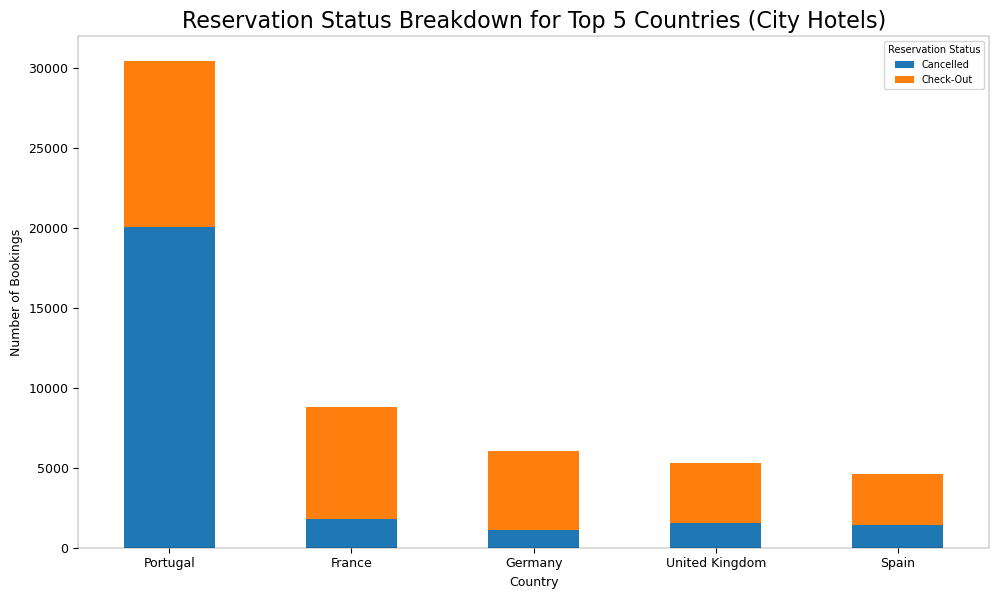

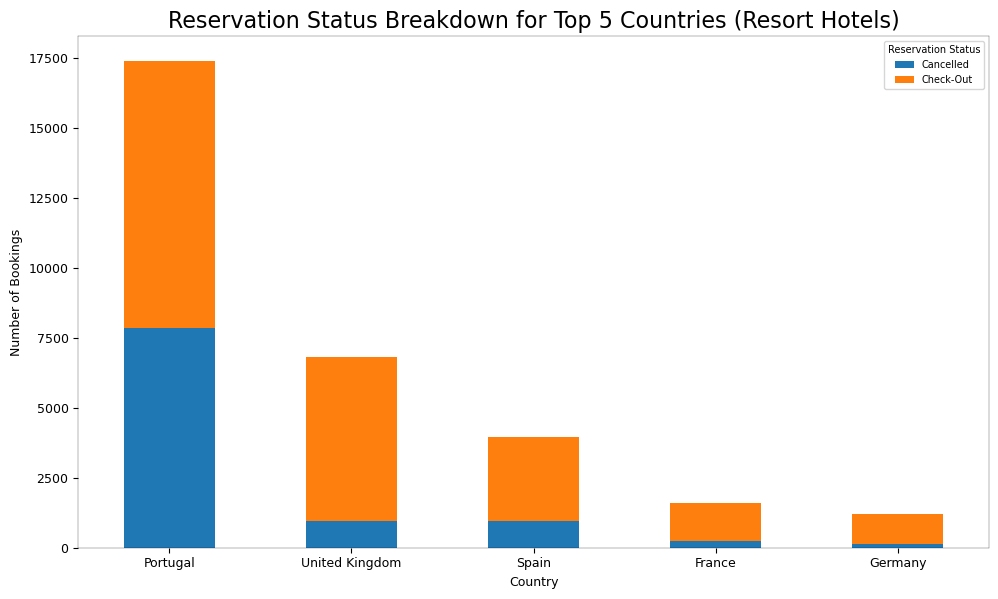

In [13]:
# Separate data for City Hotels and Resort Hotels
city_hotels = unstacked_top5[unstacked_top5.index.get_level_values('hotel') == 'City Hotel'].copy()
resort_hotels = unstacked_top5[unstacked_top5.index.get_level_values('hotel') == 'Resort Hotel'].copy()

# CITY HOTEL

# Calculate total bookings for each country
city_hotels['Total_Bookings'] = city_hotels[['Cancelled', 'Check-Out']].sum(axis=1)

# Sort the dataframe by total bookings in descending order
city_hotels_sorted = city_hotels.sort_values(by='Total_Bookings', ascending=False)

# Create the bar chart
ax = city_hotels_sorted[['Cancelled', 'Check-Out']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Reservation Status Breakdown for Top 5 Countries (City Hotels)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

# Get the sorted country names
countries = [idx[0] for idx in city_hotels_sorted.index]

# Set the x-axis tick labels
ax.set_xticklabels(countries, rotation=0, ha='center')

plt.legend(title='Reservation Status')

# Add total booking numbers on top of the bars
'''for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='black')'''

plt.tight_layout()
plt.show()

# RESORT HOTEL

# Calculate total bookings for each country
resort_hotels['Total_Bookings'] = resort_hotels[['Cancelled', 'Check-Out']].sum(axis=1)

# Sort the dataframe by total bookings in descending order
resort_hotels_sorted = resort_hotels.sort_values(by='Total_Bookings', ascending=False)

# Create the bar chart
ax_RH = resort_hotels_sorted[['Cancelled', 'Check-Out']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Reservation Status Breakdown for Top 5 Countries (Resort Hotels)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

# Get the sorted country names
countries = [idx[0] for idx in resort_hotels_sorted.index]

# Set the x-axis tick labels
ax_RH.set_xticklabels(countries, rotation=0, ha='center')

plt.legend(title='Reservation Status')

# Add total booking numbers on top of the bars
'''for p in ax_RH.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax_RH.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='black')'''

plt.tight_layout()
plt.show()

BQ1 insight(s): 

1. I decided to split it into two charts (City Hotel and Resort Hotel) for easier viewing. While visualizing this, reservation_status = No-Show seems to be a tiny and negligible amount, hence decided not to include them in.

2. As shown in charts above, Portugese make up the biggest number of bookings, including for both check-out and cancelled. On this note, more efforts should be focused on the Portugese market.

3. Another interesting insight from the above charts is that the Portuguese market has a very high cancellation rate. For next 4 countries (UK, Spain, France, Germany), of the total number of bookings, about 30% or less ended up cancelling, and about 70% or more proceeded with the booking and ended with a check-out status. However, for the Portugese market, the cancellation rates was close to 50% for Resort Hotel, and more than 50% for City Hotel. Hence, with a high number booking, and also high number of cancellation, it would be wise to focus on how we can reduce cancellation rates for the Portugese market.

---

### 4.2 BQ2

BQ2: What is the relationship between reservation status and deposit for both City Hotel and Resort Hotel?

BQ2 Visualisation Code

In [14]:
# Filter for Portugal
portugal = df[df['country_name'] == 'Portugal']
# 1. Group, count, and calculate totals BEFORE unstacking
portugal_grouped = portugal.groupby(['hotel', 'reservation_status', 'deposit_type'])['deposit_type'].count().reset_index(name='count')
portugal_grouped

,hotel,reservation_status,deposit_type,count
0,City Hotel,Cancelled,No Deposit,7339
1,City Hotel,Cancelled,Non Refund,12690
2,City Hotel,Cancelled,Refundable,4
3,City Hotel,Check-Out,No Deposit,10394
4,City Hotel,Check-Out,Non Refund,16
5,City Hotel,No-Show,No Deposit,512
6,City Hotel,No-Show,Non Refund,16
7,Resort Hotel,Cancelled,No Deposit,6403
8,Resort Hotel,Cancelled,Non Refund,1416
9,Resort Hotel,Cancelled,Refundable,18


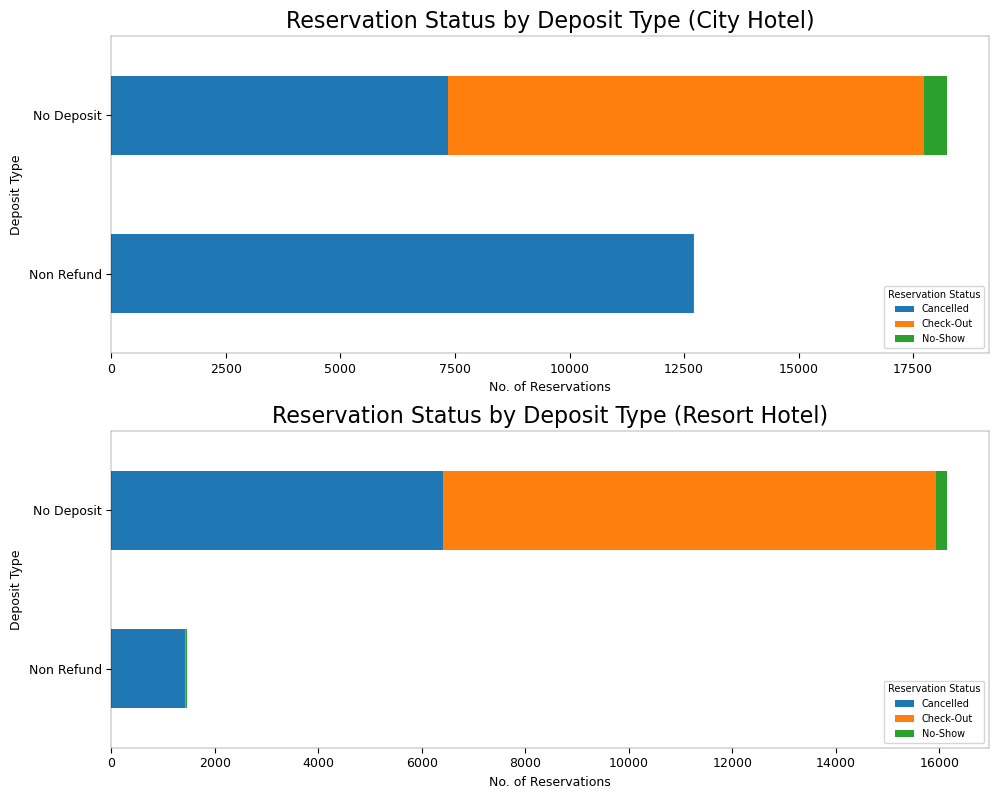

In [15]:
# Filter out 'Refundable' deposit type
portugal_filtered = portugal_grouped[portugal_grouped['deposit_type'] != 'Refundable']

# 1. Calculate total bookings for each deposit type
deposit_totals_city = portugal_filtered[portugal_filtered['hotel'] == 'City Hotel'].groupby('deposit_type')['count'].sum()
deposit_totals_resort = portugal_filtered[portugal_filtered['hotel'] == 'Resort Hotel'].groupby('deposit_type')['count'].sum()

# 2. Sort deposit types in descending order
sorted_deposits_city = deposit_totals_city.sort_values(ascending=True).index
sorted_deposits_resort = deposit_totals_resort.sort_values(ascending=True).index

# 3. Pivot the data using the sorted order
city_pivot = portugal_filtered[portugal_filtered['hotel'] == 'City Hotel'].pivot(index='deposit_type', columns='reservation_status', values='count').fillna(0).loc[sorted_deposits_city]
resort_pivot = portugal_filtered[portugal_filtered['hotel'] == 'Resort Hotel'].pivot(index='deposit_type', columns='reservation_status', values='count').fillna(0).loc[sorted_deposits_resort]

# Plotting the horizontal stacked bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# City Hotel Chart
ax0 = city_pivot.plot(kind='barh', ax=axes[0], stacked=True)  # barh for horizontal
axes[0].set_title('Reservation Status by Deposit Type (City Hotel)', fontsize=16)
axes[0].set_ylabel('Deposit Type')  # Y-axis label now describes categories
axes[0].set_xlabel('No. of Reservations')  # X-axis label is the count
axes[0].legend(title='Reservation Status')

# Annotations (adjust position for horizontal bars)
'''for p in ax0.patches:
    width = p.get_width()
    if width > 0:
        y_center = p.get_y() + p.get_height() / 2
        ax0.annotate(f'{int(width)}', (width * 1.005, y_center), va='center')'''  # Adjust x position

# Resort Hotel Chart
ax1 = resort_pivot.plot(kind='barh', ax=axes[1], stacked=True)  # barh for horizontal
axes[1].set_title('Reservation Status by Deposit Type (Resort Hotel)', fontsize=16)
axes[1].set_ylabel('Deposit Type')  # Y-axis label now describes categories
axes[1].set_xlabel('No. of Reservations')  # X-axis label is the count
axes[1].legend(title='Reservation Status')

# Annotations (adjust position for horizontal bars)
'''for p in ax1.patches:
    width = p.get_width()
    if width > 0:
        y_center = p.get_y() + p.get_height() / 2
        ax1.annotate(f'{int(width)}', (width * 1.005, y_center), va='center')'''  # Adjust x position

plt.tight_layout()
plt.show()


BQ2 insight(s): 

1. For both City Hotel and Resort Hotel, count of refundable deposits are very low and minimal. No comments/insights on Refundables due to too little data. Opted not to include it in

2. For both City Hotel and Resort Hotel, Non-Refund appears to have very high cancellation rates, compared to actual check-outs. It is generally a good thing to have high Non-refund rates because this means that the hotels are still earning money, while not having to serve the guests. However, with that being said, it is still not good for hotels to have high cancellation rates as this might affect the reputation of the hotel, and might impact future bookings by prospective guests.

3. For no deposit, generally, check-out rates are higher than cancellation rates. However, cancellation rates are still high, amounting close to half of overall number of bookings. Hence, it would do the hotel good to try to reduce cancellation rates.

---

### 4.3 BQ3

BQ3: What months of the year had higher/lower check-outs?

BQ3 Visualisation Code

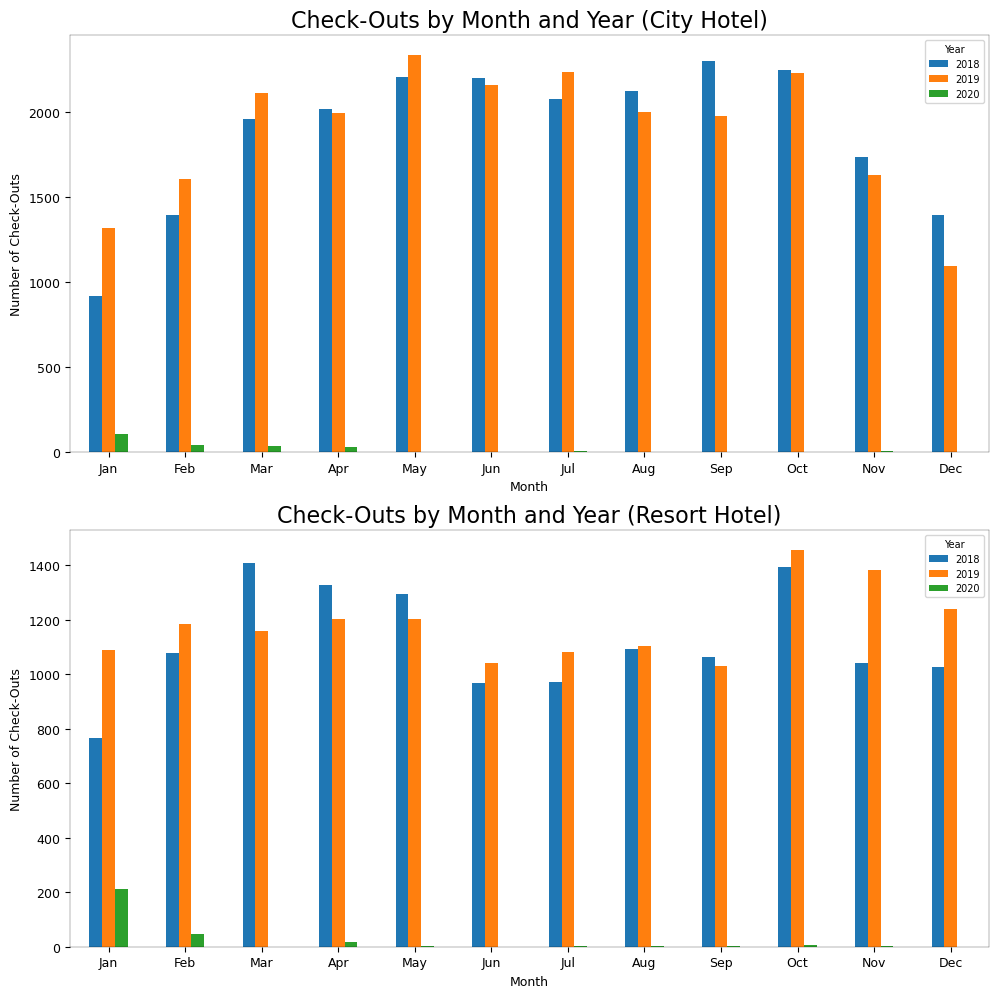

In [18]:
# Create a copy of the DataFrame
df_checked_out = df_checked_out.copy() 
 
# Convert 'arrival_date' to datetime
df_checked_out['arrival_date'] = pd.to_datetime(df_checked_out['arrival_date'], errors='coerce')

# Extract month and year
df_checked_out['month'] = df_checked_out['arrival_date'].dt.month
df_checked_out['year'] = df_checked_out['arrival_date'].dt.year

# 3. Drop rows with NaT values
df_checked_out = df_checked_out.dropna(subset=['arrival_date'])

# Group and count for City Hotel
city_checkouts = df_checked_out[df_checked_out['hotel'] == 'City Hotel'].groupby(['month', 'year']).size().unstack().fillna(0)

# Group and count for Resort Hotel
resort_checkouts = df_checked_out[df_checked_out['hotel'] == 'Resort Hotel'].groupby(['month', 'year']).size().unstack().fillna(0)

# Plotting (no changes needed here)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# City Hotel Chart
city_checkouts.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Check-Outs by Month and Year (City Hotel)', fontsize=16)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Check-Outs')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].legend(title='Year')

# Resort Hotel Chart
resort_checkouts.plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Check-Outs by Month and Year (Resort Hotel)', fontsize=16)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Check-Outs')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].legend(title='Year')

plt.tight_layout()
plt.show()

BQ3 insight(s): 

1. For both City Hotel and Resort Hotel, bookings for 2020 are very low. One highly plausible reason could be due to the global pandemic Covid-19, when the world was in lockdown and travelling was restricted. Hence, bookings for 2020 was extremely low

For City Hotel, bookings for Jan/Feb/Nov/Dec seem to be lower, as compared to Mar/Apr/May/Jun/Jul/Aug/Sep/Oct. One possible reason could be that it is year-end, so there might be fewer business travellers as they are away on holiday. Recommended action here would be to run promotions during Jan/Feb/Nov/Dec to continue to increase room occupancy rates

For Resort Hotel, Oct/Nov/Dec seem to be the better performing months. In the above analysis, I guessed that bookings for Nov/Dec for City Hotels are low because people are away on holiday. This chart confirmed my guess as bookings for Nov/Dec for resort hotel is higher

For Resort Hotel, bookings for Jun/Jul/Aug/Sep/Jan appears to be lower. May want to consider running promotions to increase room occupancy rates during these lull months

---

### 4.4 BQ4

BQ4: What is the average review score for each hotel by the Portugese, broken down by hotel and months and year

BQ4 Visualisation Code

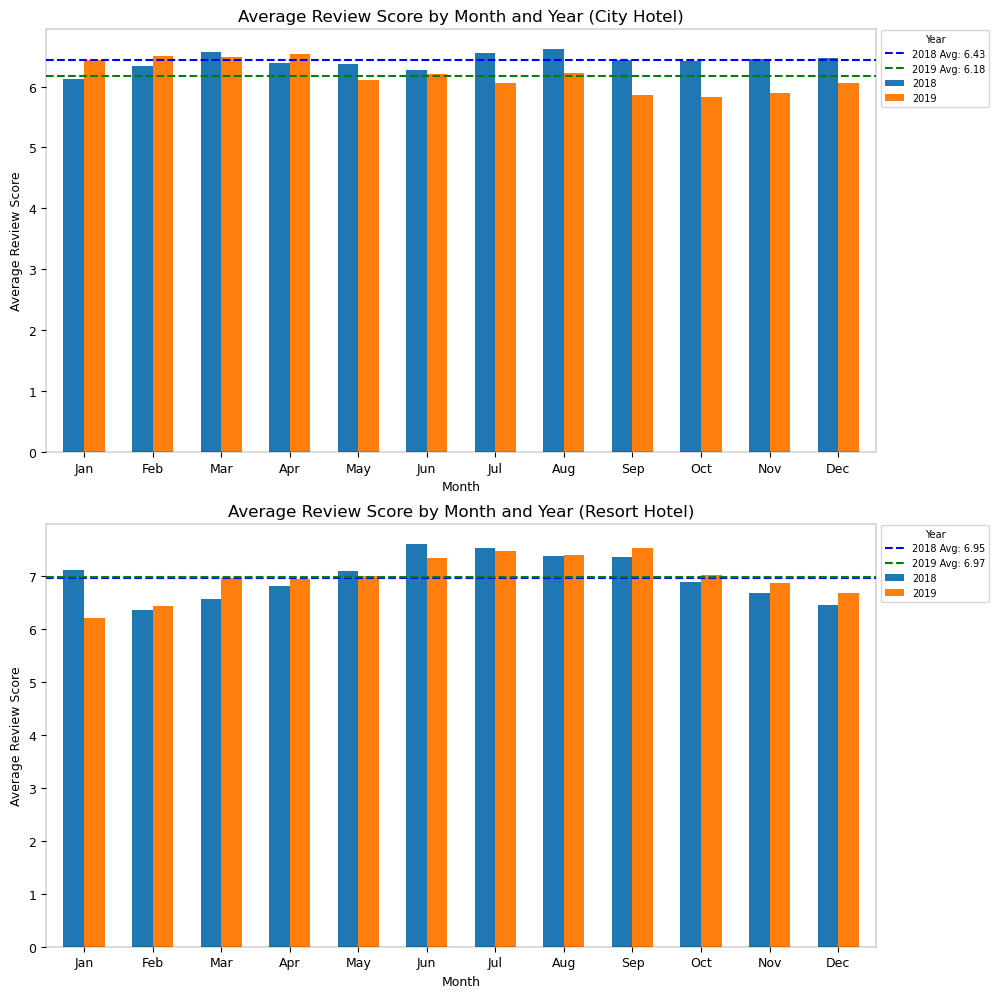

: 

In [33]:
# Convert 'arrival_date' to datetime, handling potential errors
df_checked_out['arrival_date'] = pd.to_datetime(df_checked_out['arrival_date'], errors='coerce')

# Drop rows with NaT values that may have resulted from the conversion
df_checked_out = df_checked_out.dropna(subset=['arrival_date'])

# Extract month and year
df_checked_out['month'] = df_checked_out['arrival_date'].dt.month
df_checked_out['year'] = df_checked_out['arrival_date'].dt.year

# Filter for relevant years (2018, 2019, 2020 - you can adjust this if needed)
df_checked_out = df_checked_out[df_checked_out['year'].isin([2018, 2019])]

# Calculate average review scores by month and year for each hotel type
def calculate_avg_review(df):
    return df.groupby(['month', 'year'])['review_score'].mean().unstack().fillna(0)

city_reviews = calculate_avg_review(df_checked_out[df_checked_out['hotel'] == 'City Hotel'])
resort_reviews = calculate_avg_review(df_checked_out[df_checked_out['hotel'] == 'Resort Hotel'])

# Calculate average review scores for each hotel and year
city_avg_2018 = df_checked_out[(df_checked_out['hotel'] == 'City Hotel') & (df_checked_out['year'] == 2018)]['review_score'].mean()
city_avg_2019 = df_checked_out[(df_checked_out['hotel'] == 'City Hotel') & (df_checked_out['year'] == 2019)]['review_score'].mean()
resort_avg_2018 = df_checked_out[(df_checked_out['hotel'] == 'Resort Hotel') & (df_checked_out['year'] == 2018)]['review_score'].mean()
resort_avg_2019 = df_checked_out[(df_checked_out['hotel'] == 'Resort Hotel') & (df_checked_out['year'] == 2019)]['review_score'].mean()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# City Hotel Chart
city_reviews.plot(kind='bar', ax=axes[0], rot=0, width=0.6)  # Reduced width
axes[0].axhline(city_avg_2018, color='blue', linestyle='--', label=f'2018 Avg: {city_avg_2018:.2f}')  # Use axes[0]
axes[0].axhline(city_avg_2019, color='green', linestyle='--', label=f'2019 Avg: {city_avg_2019:.2f}')  # Use axes[0]
axes[0].set_title('Average Review Score by Month and Year (City Hotel)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Review Score')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].legend(title='Year', bbox_to_anchor=(1, 1.01), loc='upper left')


# Resort Hotel Chart
resort_reviews.plot(kind='bar', ax=axes[1], rot=0, width=0.6)  # Reduced width
axes[1].axhline(resort_avg_2018, color='blue', linestyle='--', label=f'2018 Avg: {resort_avg_2018:.2f}')  # Use axes[1]
axes[1].axhline(resort_avg_2019, color='green', linestyle='--', label=f'2019 Avg: {resort_avg_2019:.2f}')  # Use axes[1]
axes[1].set_title('Average Review Score by Month and Year (Resort Hotel)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Review Score')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].legend(title='Year', bbox_to_anchor=(1, 1.01), loc='upper left')

plt.tight_layout()
plt.show()

BQ4 insight(s): 

CITY HOTEL
1. Average reviews are around the ranges of 6+ for both 2018 and 2019. 

2. Most of 2018 had better review scores, as compared to 2019.

3. It appears that reviews were hovering around 6.43 range from Jul 2018 to Apr 2019. After that, average reviews fell. 

4. Ratings for Sep - Dec 2019 are very low. 

5. Ratings for Sep - Dec for both 2018 and 2019 are on average or below average. This could mean that service standards during these months drop.

Actions: to investigate what happened from May 2019 that caused the drop in reviews, so that we can rectify the issue and prevent drops in review ratings. To also look into resource allocations for the months of Sep - Dec to prevent drop in review ratings.

RESORT HOTEL
1. Average ratings for resort hotel are higher than city hotel

2. Average ratings for resort hotel remain rather constant for 2 years, hovering 6.95-6.97

3. For the periods Jun to Sep, ratings are above average. Something seems to be going right there. To investigate ops process/procedure/resource allocation to ensure we can continue to replicate such service standards

4. There seems to be a trend that from Oct to Dec (for both 2018 and 2019), average ratings were going down. To investigate why, so that we can allocate resources to boost review ratings during those months

5. Jan/Feb 2019 had very long review ratings. To consider boosting resources during Jan/Feb to ensure average ratings are not too low

---

## Reference: Data Dictionary
<hr style="border: 0; height: 2px; background-image: linear-gradient(to right, rgba(34,193,195,1) 0%, rgba(253,187,45,1) 100%);">

__The dataset contains the following columns:__<br><br>
<br><br>__hotel__: Hotel (Resort Hotel or City Hotel)
<br><br>__is_cancelled__: Value indicating if the reservation was cancelled or no show (1) or not (0)
<br><br>__lead_time__: Number of days that elapsed between the entering date of the reservation into the Francisco Hospitality Holdings’ hotel reservation system and the arrival date
<br><br>__arrival_date__: Arrival date of guest
<br><br>__stays_in_weekend_nights__: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
<br><br>__stays_in_week_nights__: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
<br><br>__adults__: Number of adults
<br><br>__children__: Number of children
<br><br>__babies__: Number of babies
<br><br>__meal__: Type of meal booked. Categories are presented in standard hospitality meal packages:
<li>Undefined/SC – no meal package
<li>BB – Bed & Breakfast
<li>HB – Half board (breakfast and one other meal – usually dinner)
<li>FB – Full board (breakfast, lunch and dinner)

<br><br>__country__: Country of origin. Categories are represented the 3-character ISO country codes format.
<br><br>__market_segment__: Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
<br><br>__distribution_channel__: Reservation distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"
<br><br>__reserved_room_type__: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
<br><br>__assigned_room_type__: Code for the type of room assigned to the reservation. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
<br><br>__deposit_type__: Indication on if the customer made a deposit to guarantee the reservation. This variable can assume three categories:
•	No Deposit – no deposit was made
•	Non Refund – a deposit was made in the value of the total stay cost
•	Refundable – a deposit was made with a value under the total cost of stay.
<br><br>__agent_id___ of the travel agency that made the reservation
<br><br>__company_id___ of the company/entity that made the reservation or responsible for paying the reservation. ID is presented instead of designation for anonymity reasons.
<br><br>__customer_type__: Type of reservation, assuming one of four categories:
•	Contract - when the reservation has an allotment or other type of contract associated to it
•	Group – when the reservation is associated to a group
•	Transient – when the reservation is not part of a group or contract, and is not associated to other transient reservation
•	Transient-party – when the reservation is transient, but is associated to at least other transient reservation
<br><br>__avg_daily_rate__: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
<br><br>__reservation_status__: Reservation last status, assuming one of three categories:
•	Cancelled – reservation was cancelled by the customer
•	Check-Out – customer has checked in and has already departed, i.e. completed stay
•	No-Show – customer did not check-in and did inform the hotel of the reason why
<br><br>__reservation_status_date__: Date at which the last status was set. This variable can be used in conjunction with the reservation_status to understand when was the reservation cancelled or when did the customer checked-out of the hotel.
<br><br>__review_score__: Review Score (0 to 10) on the satisfaction of stay made by customer upon Check-Out from the hotel.

